In [7]:
!pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Library for creating visualizations
import seaborn as sns
import datetime as dt # To convert to datetime object
from haversine import haversine, Unit #to calculate distance between two points
import warnings
warnings.filterwarnings('ignore')

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
#Read data using pandas read_csv method
taxi=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NewYorkDataset/train.csv")

EXPLORATORY DATA ANALYSIS
 



In [11]:
#to observe the statistical terms of the numerical data
taxi.describe().T 

,count,mean,std,min,25%,50%,75%,max
vendor_id,1458644.0,1.534950,0.498777,1.000000,1.000000,2.000000,2.000000,2.000000e+00
passenger_count,1458644.0,1.664530,1.314242,0.000000,1.000000,1.000000,2.000000,9.000000e+00
pickup_longitude,1458644.0,-73.973486,0.070902,-121.933342,-73.991867,-73.981743,-73.967331,-6.133553e+01
pickup_latitude,1458644.0,40.750921,0.032881,34.359695,40.737347,40.754101,40.768360,5.188108e+01
dropoff_longitude,1458644.0,-73.973416,0.070643,-121.933304,-73.991325,-73.979752,-73.963013,-6.133553e+01
dropoff_latitude,1458644.0,40.751800,0.035891,32.181141,40.735885,40.754524,40.769810,4.392103e+01
trip_duration,1458644.0,959.492273,5237.431724,1.000000,397.000000,662.000000,1075.000000,3.526282e+06


In [12]:
# isna to find for not available values and sum to find the number of values
taxi.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [13]:
# to find duplicated in the data
taxi.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1458639    False
1458640    False
1458641    False
1458642    False
1458643    False
Length: 1458644, dtype: bool

Text(0, 0.5, 'Each Passenger Count')

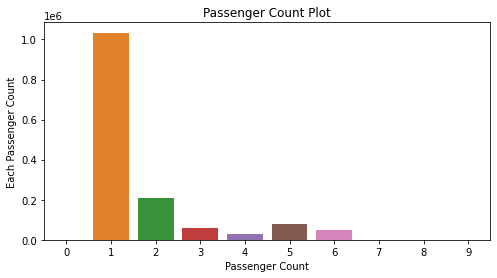

In [14]:
#Plot passenger count using sns countplot
plt.figure(figsize=(8,4))
sns.countplot(taxi['passenger_count'])
plt.title('Passenger Count Plot')
plt.xlabel('Passenger Count')
plt.ylabel('Each Passenger Count')

In [15]:
#Convert pickup datetime datatype from Object to datetime datatype
taxi['pickup_datetime']=pd.to_datetime(taxi['pickup_datetime'])
 

In [16]:
taxi['dropoff_datetime']=pd.to_datetime(taxi['dropoff_datetime'])
 

In [17]:
taxi.describe(include = 'object').T

,count,unique,top,freq
id,1458644,1458644,id2875421,1
store_and_fwd_flag,1458644,2,N,1450599


In [18]:
#Add new columns that show month,day,weekday,hour,minute, that can be drawn from pickup datetime using appropriate methods
taxi['pickup_month']=(taxi['pickup_datetime']).dt.month
taxi['pickup_day']=(taxi['pickup_datetime']).dt.day
taxi['pickup_weekday']=(taxi['pickup_datetime']).dt.weekday
taxi['pickup_hour']=(taxi['pickup_datetime']).dt.hour
taxi['pickup_minute']=(taxi['pickup_datetime']).dt.minute


In [19]:
taxi['dropoff_month']=(taxi['pickup_datetime']).dt.month
taxi['dropoff_weekday']=(taxi['pickup_datetime']).dt.weekday
taxi['dropoff_day']=(taxi['pickup_datetime']).dt.day
taxi['dropoff_hour']=(taxi['pickup_datetime']).dt.hour
taxi['dropoff_minute']=(taxi['pickup_datetime']).dt.minute



In [20]:
#Function to Compute distance between two points with 4 columns from the dataset using haversine method
def calculate_distance(pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude):
  start_location=(pickup_longitude,pickup_latitude)
  end_location=(dropoff_longitude,dropoff_latitude)
  return haversine(start_location,end_location,unit='km')


In [21]:
#Assign computed distance to a new column haversine_trip_distance
taxi['haversine_trip_distance'] = taxi.apply(lambda x : calculate_distance(x['pickup_latitude'],
                                                                 x['pickup_longitude'],
                                                                 x['dropoff_latitude'],
                                                                 x['dropoff_longitude']), axis = 1)

In [22]:
#To get an understanding of number of numercial columns present in the data, we can use describe and columns
numerical_columns=taxi.describe().columns
numerical_columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration',
       'pickup_month', 'pickup_day', 'pickup_weekday', 'pickup_hour',
       'pickup_minute', 'dropoff_month', 'dropoff_weekday', 'dropoff_day',
       'dropoff_hour', 'dropoff_minute', 'haversine_trip_distance'],
      dtype='object')

In [23]:
#To get categorical columns use select datatypes and include Object
categorical_columns=taxi.select_dtypes(include='object')
categorical_columns

,id,store_and_fwd_flag
0,id2875421,N
1,id2377394,N
2,id3858529,N
3,id3504673,N
4,id2181028,N
...,...,...
1458639,id2376096,N
1458640,id1049543,N
1458641,id2304944,N
1458642,id2714485,N


In [24]:
#To find the number of unique values present in passenger count
taxi['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

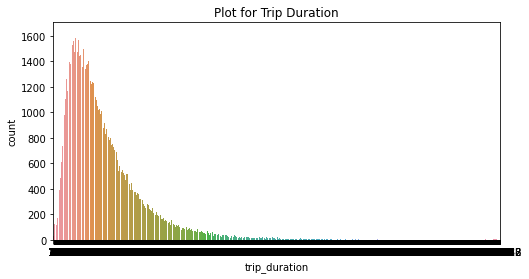

In [25]:
#Plot figure showing trip duration to get an understanding of the nature of data
plt.figure(figsize=(8,4))
sns.countplot(taxi['trip_duration'])
plt.title('Plot for Trip Duration')
plt.show()

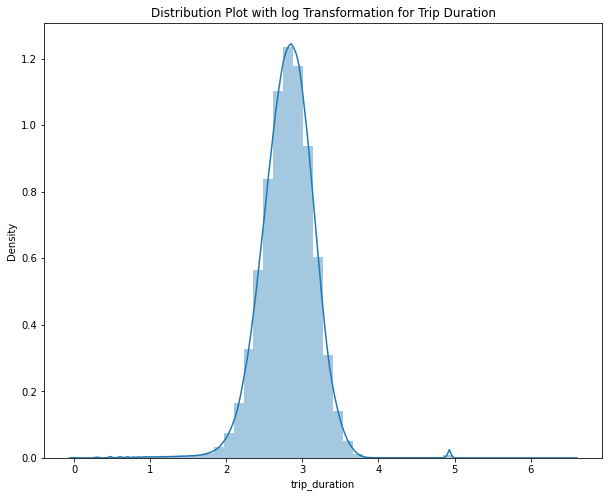

In [26]:
#To transform skewed data into normal data, normalize the data using the log method
plt.figure(figsize=(10,8))
sns.distplot(np.log10(taxi['trip_duration']))
plt.title('Distribution Plot with log Transformation for Trip Duration')
plt.show()

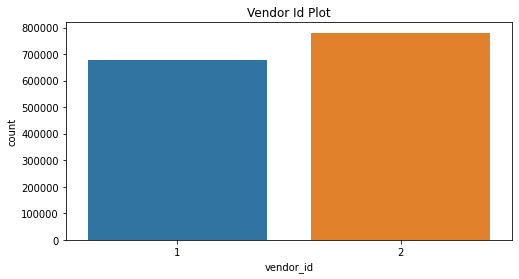

In [27]:
#Plot vendor id
plt.figure(figsize=(8,4))
sns.countplot(taxi['vendor_id'])
plt.title('Vendor Id Plot')
plt.show()

In [28]:
#Define a function that divides the day time into different segments upon passing pickup or dropoff hour
def dusk_to_dawn(k):
    if k in range(6,12):
        return 'Morning'
    elif k in range(12,16):
        return 'Afternoon'
    elif k in range(16,22):
        return 'Evening'
    else:
        return 'Night'

In [29]:
#Apply day time method and assign to pickup day time and dropoff day time new columns
taxi['pickup_day_time']=taxi['pickup_hour'].apply(dusk_to_dawn)
taxi['dropoff_day_time']=taxi['dropoff_hour'].apply(dusk_to_dawn)

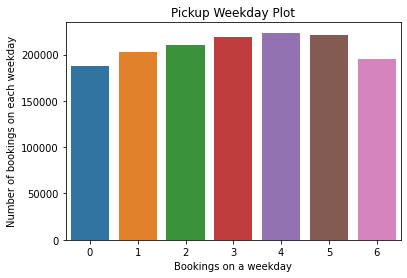

In [30]:
#Plot Number of bookings for each weekday
sns.countplot(taxi['pickup_weekday'])
plt.title('Pickup Weekday Plot')
plt.xlabel('Bookings on a weekday')
plt.ylabel('Number of bookings on each weekday') 
plt.show()

 From the demographics of the above picture it can be figured that the Number of bookings of taxi on Friday and Saturday is higher when compared to the other days.

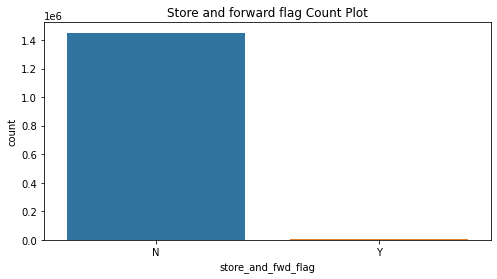

In [31]:
#Plot figure for Store and Forward flag to visualize count of values with Y and N
plt.figure(figsize=(8,4))
sns.countplot(taxi['store_and_fwd_flag'])
plt.title('Store and forward flag Count Plot')
plt.show()

From the above figure Store and forward flag has only N value and no Y value

Text(0, 0.5, 'Number of taxi bookings on each day')

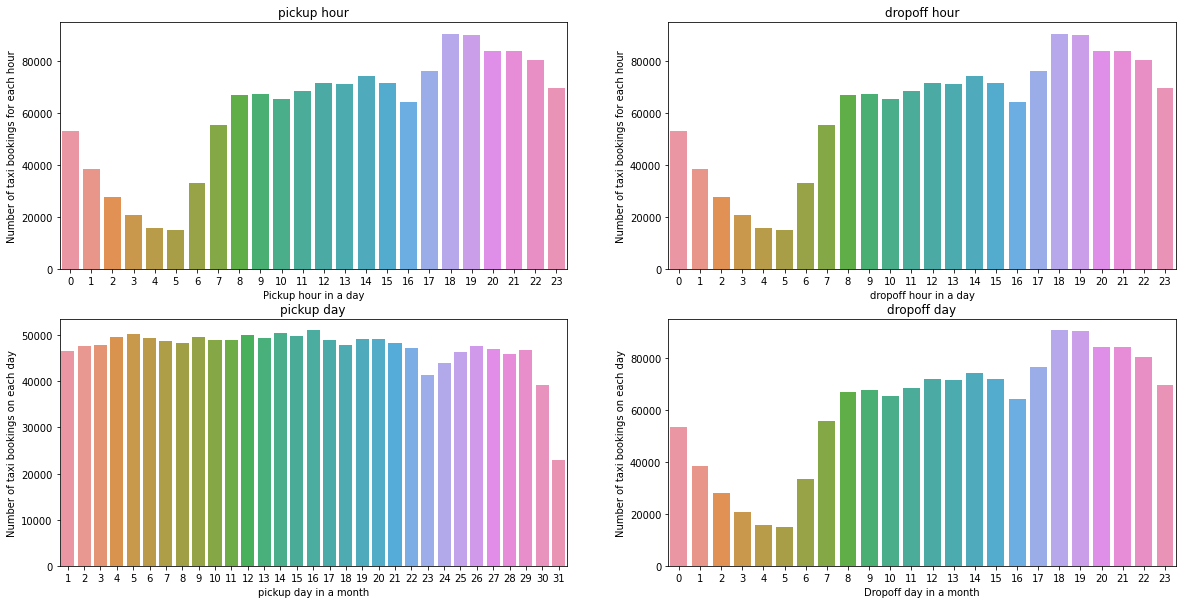

In [32]:
#plot 4 subplots to show pickup hour,dropoff hour, pickup day, drop off day together in One plot
fig, ((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2,figsize=(20,10))
#Plotting for pickup hour and dropoff hour
ax=sns.countplot(taxi['pickup_hour'],ax=ax1)
ax1.set_title('pickup hour')
ax1.set_xlabel('Pickup hour in a day')
ax1.set_ylabel('Number of taxi bookings for each hour')
ax=sns.countplot(taxi['dropoff_hour'],ax=ax2)
ax2.set_title('dropoff hour')
ax2.set_xlabel('dropoff hour in a day')
ax2.set_ylabel('Number of taxi bookings for each hour')
#Plotting for pickup day and dropoff day
ax=sns.countplot(taxi['pickup_day'],ax=ax3)
ax3.set_title('pickup day')
ax3.set_xlabel('pickup day in a month')
ax3.set_ylabel('Number of taxi bookings on each day')
ax=sns.countplot(taxi['pickup_hour'],ax=ax4)
ax4.set_title('dropoff day')
ax4.set_xlabel('Dropoff day in a month')
ax4.set_ylabel('Number of taxi bookings on each day')

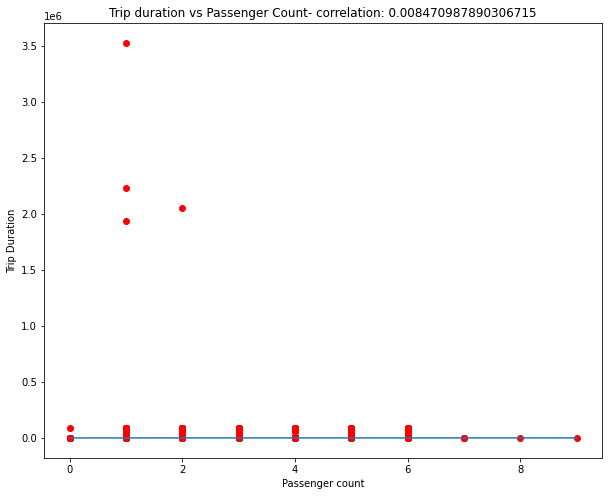

In [33]:
#Plot figure to understand the relationship between Passenger count and trip duration
fig=plt.figure(figsize=(10,8))
x=taxi['passenger_count']
y=taxi['trip_duration']
correlation=x.corr(y)
plt.scatter(x,y,color='red')
plt.xlabel('Passenger count')
plt.ylabel('Trip Duration')
plt.title('Trip duration vs Passenger Count' + '- correlation: ' + str(correlation))

plt.plot(np.poly1d( np.polyfit(x,y,1))(np.unique(x)))
plt.show()

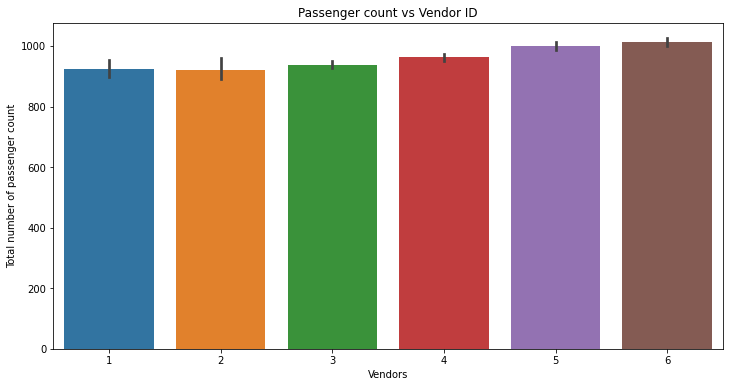

In [34]:
plt.figure(figsize = (12, 6)) 
sns.barplot(y = 'trip_duration', x = 'pickup_month', data = taxi) 
plt.title('Passenger count vs Vendor ID')
plt.xlabel('Vendors')
plt.ylabel('Total number of passenger count') 
plt.show()

In [35]:
group_by_month = taxi.groupby(['pickup_month', 'vendor_id']).size() 
group_by_month = group_by_month.unstack() 
group_by_month

vendor_id,1,2
pickup_month,,
1,105602,124105
2,110210,128090
3,118813,137376
4,117710,133935
5,116130,132357
6,109877,124439


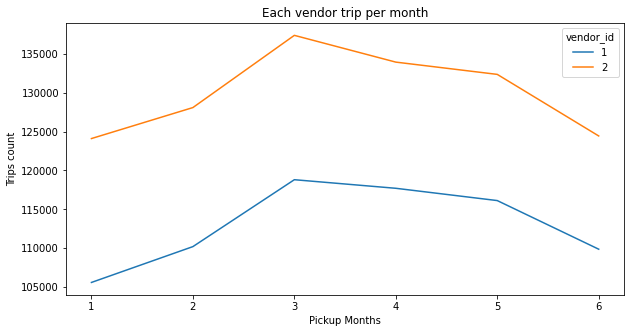

In [36]:
group_by_month.plot(kind = 'line', figsize = (10,5)) 
plt.title('Each vendor trip per month') 
plt.xlabel('Pickup Months')
plt.ylabel('Trips count') 
plt.show()

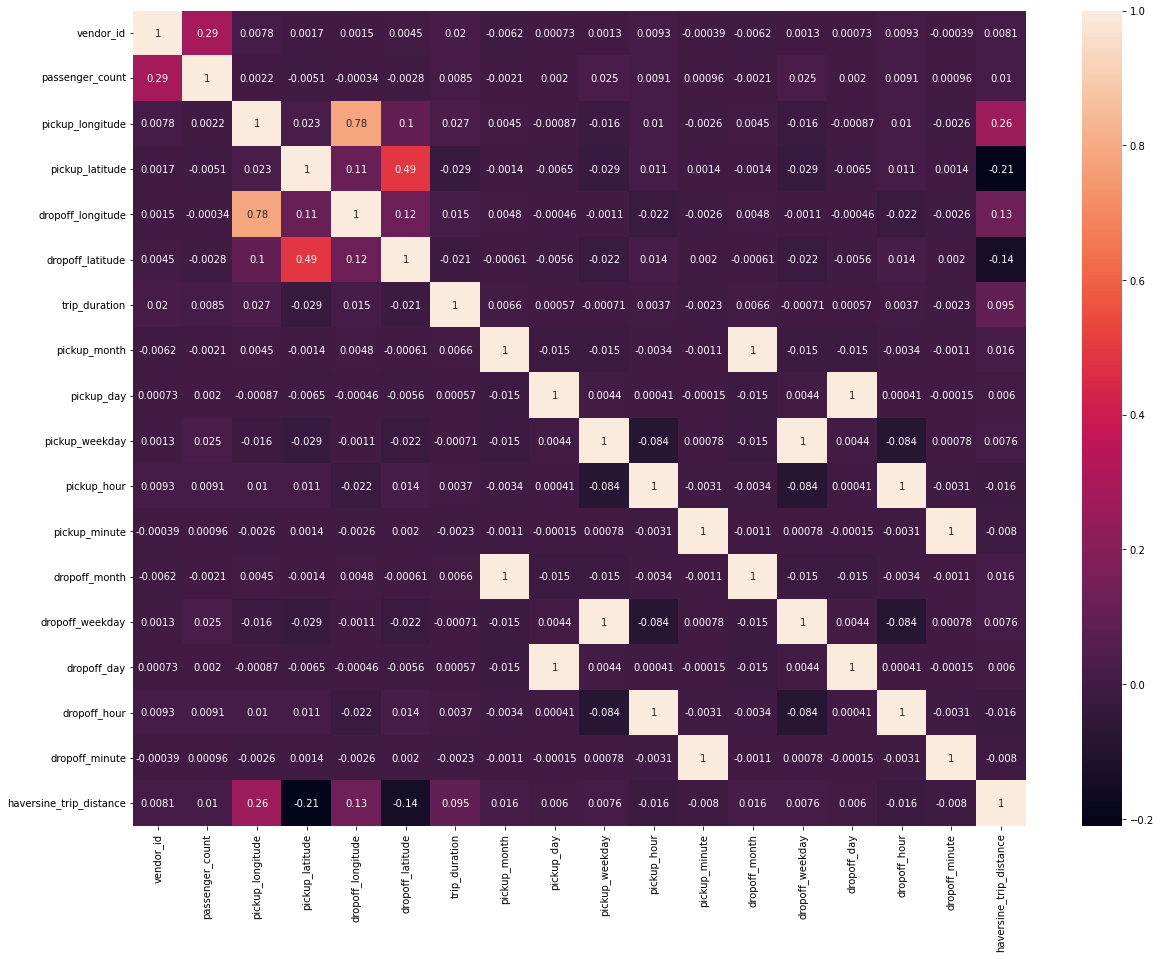

In [37]:
#Plot heatmap to visualize the correlation among all the features
plt.figure(figsize=(20,15))
corr=taxi.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [38]:
#Take data with passenger count not zero and less than 6 to remove outliers
taxi = taxi[(taxi['passenger_count'] != 0) & (taxi['passenger_count'] <= 6)]
 

In [39]:
#Now find the unique values of passenger count with value_counts method
taxi['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
Name: passenger_count, dtype: int64

In [40]:
# # check unique values in haversine distance
taxi['haversine_trip_distance'].value_counts()

0.000000    5887
0.000424     101
0.000424      52
0.000424      48
0.000848      37
            ... 
0.434274       1
3.809274       1
0.563330       1
5.925436       1
1.134044       1
Name: haversine_trip_distance, Length: 1452237, dtype: int64

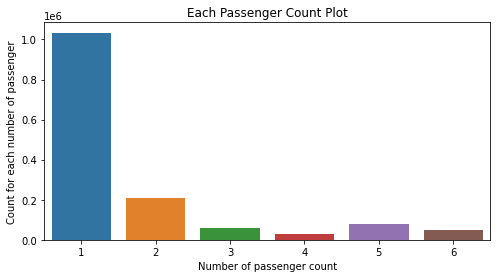

In [41]:
#plotting after removing outliers in passenger count
plt.figure(figsize = (8, 4))
sns.countplot(taxi['passenger_count'])

plt.title('Each Passenger Count Plot')

plt.xlabel('Number of passenger count')
plt.ylabel('Count for each number of passenger')

plt.show()

In [42]:
taxi = taxi[taxi['haversine_trip_distance'] != taxi['haversine_trip_distance'].min()]

In [43]:
taxi['trip_duration'].sort_values(ascending= False)

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
            ...   
1439166          1
467645           1
311745           1
1034341          1
1306890          1
Name: trip_duration, Length: 1452692, dtype: int64

In [44]:
taxi['vendor_id'].value_counts()

2    776613
1    676079
Name: vendor_id, dtype: int64

In [45]:
#Drop highly correlated features
taxi.drop(['dropoff_day', 'dropoff_month', 'dropoff_weekday'], axis = 1, inplace = True)

In [46]:
taxi.drop(['id'], axis = 1, inplace = True)

In [47]:
columns = taxi.select_dtypes(include = 'object').columns.tolist()

In [48]:
#Change all columns that are Objects, using fit_transform 
from sklearn.preprocessing import LabelEncoder 
change_datatype = LabelEncoder()
for i in columns:
    taxi[i] = change_datatype.fit_transform(taxi[i])

In [49]:
taxi.drop(['pickup_datetime', 'dropoff_datetime'], axis = 1, inplace = True)

**Modelling**

In [50]:
new_taxi=taxi.copy() #Copy to new Data Frame 

In [51]:
x=new_taxi.drop(['trip_duration'], axis = 1) #Seperate target variable from the dataset

In [52]:
y = np.log(new_taxi['trip_duration']).values #Normalize target variable by applying log

In [53]:
from sklearn.model_selection import train_test_split 

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 1) 

In [55]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((726346, 17), (726346, 17), (726346,), (726346,))

In [56]:
#Import machine learning algorithms from sklearn package
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost

In [57]:
#Define function to plot actual versus predicted values
def Plot_Actual_Vs_Predicted(actual_values,predicted_values):
  plt.figure(figsize=(10,20))
  fig,ax1=plt.subplots()
  ax1.scatter(actual_values,predicted_values)
  ax1.plot([actual_values.min(), actual_values.max()], [actual_values.min(), actual_values.max()], 'k--', lw = 4)
  ax1.set_title('Actual Vs Predicted Values')
  ax1.set_xlabel('Actual_Values')
  ax1.set_ylabel('Predicted_Values')
  plt.show()

In [58]:
MSE=[]
RMSE=[]
R2_scores=[]
from sklearn.metrics import r2_score

Let us Start with Linear Regression Model,which can be imported from sklearn package.

Linear Regression Plot


<Figure size 720x1440 with 0 Axes>

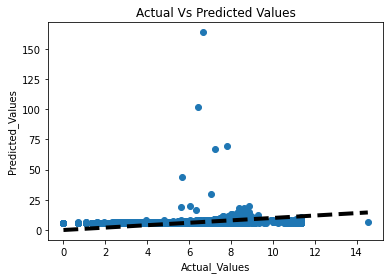

Mean Squared Error : 0.4243281725343671
Root Mean Squared Error: 0.6514047685843013


In [59]:
#select LinearRegression Model
model_linear = LinearRegression() 
#fit the model with the featured data
model_linear.fit(x_train,y_train) 
#Apply predict method on new data
pred_lin=model_linear.predict(x_test) 
print('Linear Regression Plot')
Plot_Actual_Vs_Predicted(y_test, pred_lin)

#Compute metrics using appropriate methods
mse_linear = mean_squared_error(y_test,pred_lin) 

#Collect all the scores in respective lists 
R2_scores.append(r2_score(y_test,pred_lin))
MSE.append(mse_linear)
print('Mean Squared Error :',mse_linear)
rmse_linear = np.sqrt(mse_linear)
RMSE.append(rmse_linear)
print('Root Mean Squared Error:',rmse_linear)

Next,let's implement DecisionTree Algorithm 

Decision Tree Regressor Plot


<Figure size 720x1440 with 0 Axes>

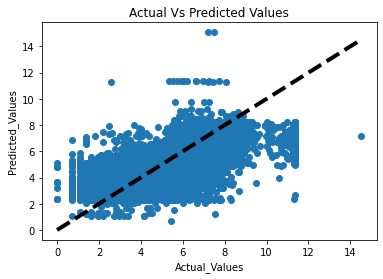

Mean Squared Error 0.19648262179530349
Root Mean Squared Error 0.44326360305725926


In [60]:
#select DecisionTreeRegressor
model_decision = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 10)
model_decision.fit(x_train,y_train)
pred_dec=model_decision.predict(x_test)

print('Decision Tree Regressor Plot')
Plot_Actual_Vs_Predicted(y_test,pred_dec)
mse_dec=mean_squared_error(y_test,pred_dec)

R2_scores.append(r2_score(y_test,pred_dec))
MSE.append(mse_dec)
print('Mean Squared Error',mse_dec)
rmse_dec=np.sqrt(mse_dec)
RMSE.append(rmse_dec)
print('Root Mean Squared Error',rmse_dec)
 

Use Random Forest that gives better results than Decisioin Tree

Random Forest Regressor Plot


<Figure size 720x1440 with 0 Axes>

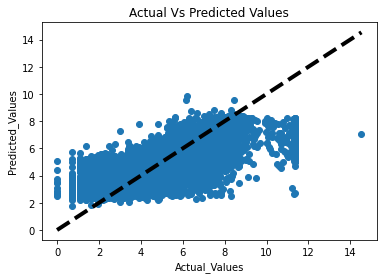

Mean Squared Error 0.18895667059231286
Root Mean Squared Error 0.4346914659759412


In [61]:
#select Random Forest Regressor
model_random = RandomForestRegressor(criterion = 'squared_error', n_estimators = 10 ,
                                              max_depth = 10)
model_random.fit(x_train,y_train)
model_random.predict(x_test)

print('Random Forest Regressor Plot')
Plot_Actual_Vs_Predicted(y_test, model_random.predict(x_test))
mse_random=mean_squared_error(y_test,model_random.predict(x_test))
R2_scores.append(r2_score(y_test, model_random.predict(x_test)))
MSE.append(mse_random)
print('Mean Squared Error',mse_random)
rmse_random=np.sqrt(mse_random)
RMSE.append(rmse_random)
print('Root Mean Squared Error',rmse_random)
# print(model_results(model,model.predict(x_test)))

XGBoost can be used to boost the performance of the model

[04:41:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost Plot


<Figure size 720x1440 with 0 Axes>

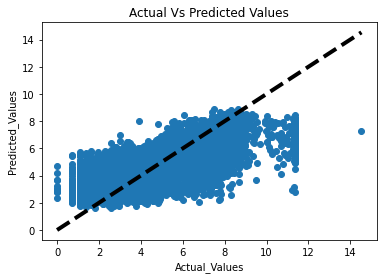

Mean Squared Error 0.15317844411077622
Root Mean Squared Error 0.3913801784847774


In [62]:
Xg_regressor = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=10)
Xg_regressor.fit(x_train, y_train)
Xg_regressor.predict(x_test)

print('XGBoost Plot')
Plot_Actual_Vs_Predicted(y_test,Xg_regressor.predict(x_test))
mse_xgb=mean_squared_error(y_test, Xg_regressor.predict(x_test))
R2_scores.append(r2_score(y_test, Xg_regressor.predict(x_test)))
MSE.append(mse_xgb)
print('Mean Squared Error',mse_xgb)
rmse_xgb=np.sqrt(mse_xgb)
RMSE.append(rmse_xgb)
print('Root Mean Squared Error',rmse_xgb)


In [63]:
data=pd.Series([MSE,RMSE,R2_scores])
data

0    [0.4243281725343671, 0.19648262179530349, 0.18...
1    [0.6514047685843013, 0.44326360305725926, 0.43...
2    [0.31378602946827916, 0.6822527261450744, 0.69...
dtype: object

In [64]:
mse_df=pd.DataFrame()

In [65]:
import pandas as pd

mse = pd.DataFrame({'Model': ['Linear Regression', 'DecisionTree', 'RadomForest','XGBoost'],
                           'MSE': MSE})

Finally let's plot metric scores for all the algorithms

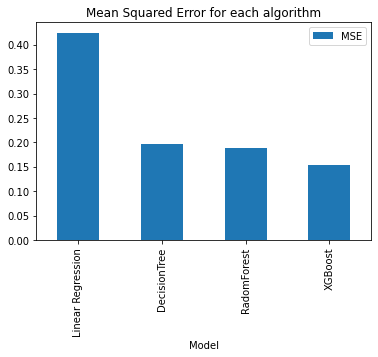

In [66]:
import matplotlib.pyplot as plt

mse.plot(x='Model', y='MSE', kind='bar')
plt.title('Mean Squared Error for each algorithm')
plt.show()

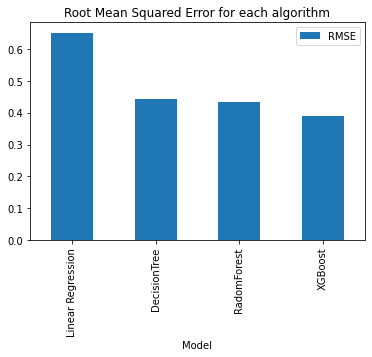

In [67]:
rmse_data = pd.DataFrame({'Model': ['Linear Regression', 'DecisionTree', 'RadomForest','XGBoost'],
                           'RMSE': RMSE})

rmse_data.plot(x='Model', y='RMSE', kind='bar')
plt.title('Root Mean Squared Error for each algorithm')
plt.show()

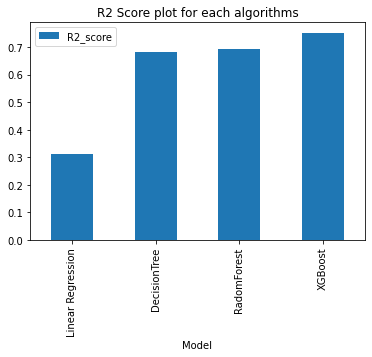

In [68]:
r2_data = pd.DataFrame({'Model': ['Linear Regression', 'DecisionTree', 'RadomForest','XGBoost'],
                           'R2_score': R2_scores})

r2_data.plot(x='Model', y='R2_score', kind='bar')
plt.title('R2 Score plot for each algorithms')
plt.show()

In [69]:
# Table showing all the metrics together for all the algorithms
r2_data,rmse_data,mse
result=rmse_data.merge(r2_data)
result.merge(mse)

,Model,RMSE,R2_score,MSE
0,Linear Regression,0.651405,0.313786,0.424328
1,DecisionTree,0.443264,0.682253,0.196483
2,RadomForest,0.434691,0.694424,0.188957
3,XGBoost,0.391380,0.752283,0.153178


From the above figures, it can be concluded that Linear Regression is not performing well and Decision Tree, RandoomForest perform almost similarly.However XGBoost performs well

**Implementing PCA to reduce dimensions**

STANDARDISING DATA

In [70]:
#Standardising data before implementing pca
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [71]:
new_taxi_1 = taxi.copy()

In [72]:
x = new_taxi_1.drop(['trip_duration'], axis = 1)
y = np.log(new_taxi_1['trip_duration']).values

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 321)

In [74]:
x_train = scaler.fit_transform(x_train) 
x_test = scaler.transform(x_test)

In [75]:
from sklearn.decomposition import PCA 
#take number of components as length for now and finalize the number after checking variance ratio
p_instance= PCA(n_components = len(new_taxi.drop(['trip_duration'], axis = 1).columns)) 
p_instance.fit_transform(x_train) 
variance_ratio = p_instance.explained_variance_ratio_
variance_ratio

array([1.56923911e-01, 1.17714094e-01, 1.09984335e-01, 9.09424734e-02,
       7.85420121e-02, 7.66229842e-02, 6.00005621e-02, 5.82504974e-02,
       5.80761231e-02, 5.72149737e-02, 4.41534409e-02, 4.14928198e-02,
       3.45138435e-02, 1.55679299e-02, 2.75707113e-32, 1.69061498e-33,
       1.18462076e-33])

Text(0.5, 1.0, 'Bar graph showing components and explained variance')

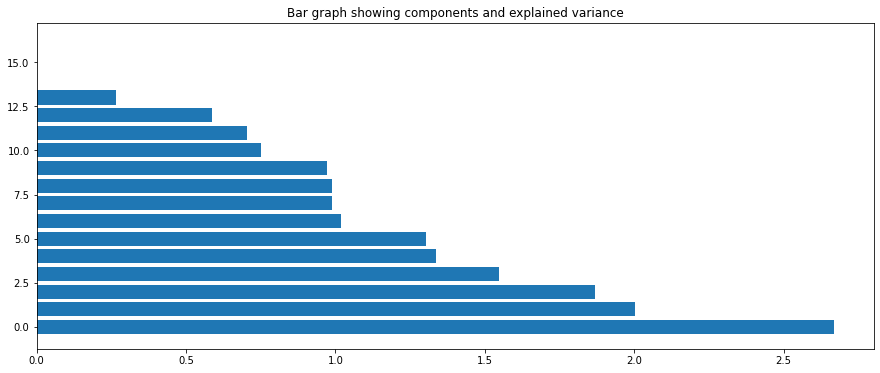

In [76]:
plt.figure(figsize=(15,6))
plt.barh(np.arange(p_instance.n_components_), p_instance.explained_variance_)
plt.title('Bar graph showing components and explained variance')

Text(0.5, 1.0, 'Elbow Plot')

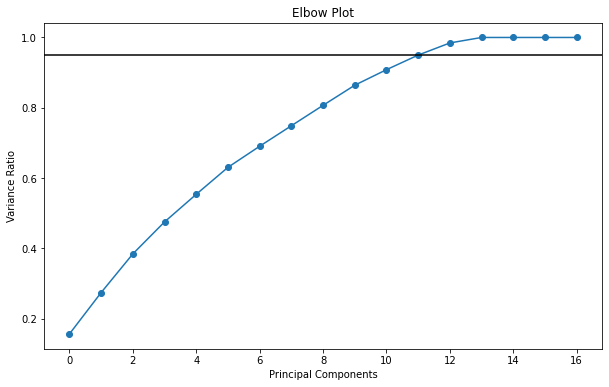

In [77]:
plt.figure(figsize=(10,6))

plt.plot(np.cumsum(variance_ratio), marker='o')

plt.axhline(y = 0.95, color = 'k', linestyle = '-')
plt.xlabel("Principal Components")
plt.ylabel("Variance Ratio")

plt.title('Elbow Plot')

From the above figure it is clear that the number of components sufficient for modeling are just 11.

In [78]:
pca = PCA(n_components = 11)
learned = pca.fit_transform(x) 
pca.explained_variance_

array([6.00299597e+02, 8.21680750e+01, 7.57475419e+01, 1.84852073e+01,
       3.80065937e+00, 2.82242717e+00, 1.93592824e+00, 1.74748427e+00,
       2.25153122e-01, 7.95862251e-03, 5.42090287e-03])

In [79]:
x = learned  
y = np.log(new_taxi['trip_duration']).values

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 321)

In [81]:
MSE_1=[]
RMSE_1=[]
R2_scores_1=[]
from sklearn.metrics import r2_score

Linear Regression after PCA


<Figure size 720x1440 with 0 Axes>

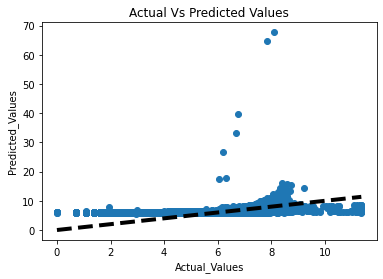

Mean Squared Error : 0.3952283004993928
Root Mean Squared Error: 0.628671854387798


In [82]:
model_linear_1 = LinearRegression()
model_linear_1.fit(x_train,y_train)
pred=model_linear_1.predict(x_test)

print('Linear Regression after PCA')
Plot_Actual_Vs_Predicted(y_test, pred)
mse_linear_1 = mean_squared_error(y_test,pred)
R2_scores_1.append(r2_score(y_test,pred))
MSE_1.append(mse_linear_1)
print('Mean Squared Error :',mse_linear_1)
rmse_linear_1 = np.sqrt(mse_linear_1)
RMSE_1.append(rmse_linear_1)
print('Root Mean Squared Error:',rmse_linear_1)

Decision tree after PCA


<Figure size 720x1440 with 0 Axes>

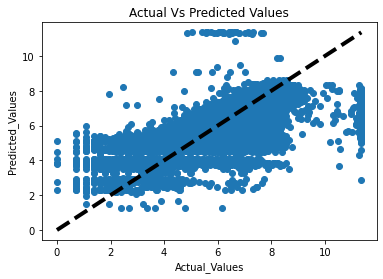

Mean Squared Error 0.20854165488657536
Root Mean Squared Error 0.45666361239601233


In [83]:
model_decision = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 10)
model_decision.fit(x_train,y_train)
pred_dec=model_decision.predict(x_test)

print('Decision tree after PCA')
Plot_Actual_Vs_Predicted(y_test, pred_dec)
mse_dec_1=mean_squared_error(y_test,pred_dec)
R2_scores_1.append(r2_score(y_test, pred_dec))
MSE_1.append(mse_dec)
print('Mean Squared Error',mse_dec_1)
rmse_dec_1=np.sqrt(mse_dec_1)
RMSE_1.append(rmse_dec_1)
print('Root Mean Squared Error',rmse_dec_1)
 

Random Forest after PCA


<Figure size 720x1440 with 0 Axes>

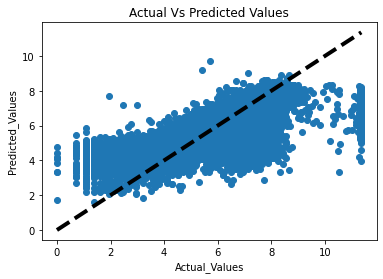

Mean Squared Error 0.20183270041616078
Root Mean Squared Error 0.44925794418814763


In [84]:
model_random = RandomForestRegressor(criterion = 'squared_error', n_estimators = 10 ,
                                              max_depth = 10)
model_random.fit(x_train,y_train)
model_random.predict(x_test)

print('Random Forest after PCA')
Plot_Actual_Vs_Predicted(y_test, model_random.predict(x_test))
mse_random_1=mean_squared_error(y_test,model_random.predict(x_test))
R2_scores_1.append(r2_score(y_test, model_random.predict(x_test)))
MSE_1.append(mse_random_1)
print('Mean Squared Error',mse_random_1)
rmse_random_1=np.sqrt(mse_random_1)
RMSE_1.append(rmse_random_1)
print('Root Mean Squared Error',rmse_random_1)
# print(model_results(model,model.predict(x_test)))

In [ ]:
Xg_regressor = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=10)
Xg_regressor.fit(x_train, y_train)
Xg_regressor.predict(x_test)

print('XGBoost after PCA')
Plot_Actual_Vs_Predicted(y_test,Xg_regressor.predict(x_test))
mse_xgb_1=mean_squared_error(y_test, Xg_regressor.predict(x_test))
R2_scores_1.append(r2_score(y_test, Xg_regressor.predict(x_test)))
MSE_1.append(mse_xgb)
print('Mean Squared Error',mse_xgb_1)
rmse_xgb_1=np.sqrt(mse_xgb_1)
RMSE_1.append(rmse_xgb_1)
print('Root Mean Squared Error',rmse_xgb_1)


[04:50:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
metrics=pd.Series([MSE_1,RMSE_1,R2_scores_1])
metrics

In [ ]:
mse_df_1=pd.DataFrame()

In [ ]:
import pandas as pd

mse_1 = pd.DataFrame({'Model': ['Linear Regression', 'DecisionTree', 'RadomForest','XGBoost'],
                           'MSE': MSE_1})

In [ ]:
import matplotlib.pyplot as plt

mse_1.plot(x='Model', y='MSE', kind='bar')
plt.show()

In [ ]:
rmse_data_1 = pd.DataFrame({'Model': ['Linear Regression', 'DecisionTree', 'RadomForest','XGBoost'],
                           'RMSE': RMSE_1})

rmse_data_1.plot(x='Model', y='RMSE', kind='bar')
plt.show()

In [ ]:
r2_data_1 = pd.DataFrame({'Model': ['Linear Regression', 'DecisionTree', 'RadomForest','XGBoost'],
                           'R2_score': R2_scores_1})

r2_data_1.plot(x='Model', y='R2_score', kind='bar')
plt.show()

In [ ]:
# result = rmse_data.merge(mse)
r2_data_1,rmse_data_1,mse_1
result_1=rmse_data_1.merge(r2_data_1)
result_1.merge(mse_1)

In [ ]:
!jupyter nbconvert --to html DS_Final_Project.ipynb